# UAP Data Analysis and Event Correlation

- [Data Origin - UPDB](https://updb.app/)
- [Nuclear Test Data](https://www.armscontrol.org/factsheets/nucleartesttally)


In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from datetime import datetime
import requests


In [53]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_sequence)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("./out/uadb.csv")

In [44]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [45]:
def get_year(row) -> int:
    try:
        year = row['date'].year
        #month = row['date'].month
        return int(year)
    except Exception as e:
        print(row)
        return np.nan
    
def get_month(row) -> int:
    try:
        month = row['date'].month
        return int(month)
    except Exception as e:
        print(row)
        return np.nan

In [ ]:
df['year']= df.apply(get_year, axis=1)
df['month']= df.apply(get_month, axis=1)

In [47]:
df.dropna(subset=['year'], inplace=True)

In [48]:
today = datetime.today().strftime('%Y-%m-%d')
df.to_parquet(f"./out/uadb_{today}.parquet")

In [50]:
tmp = df.groupby('country')['country'].count().reset_index(name='total_sightings').sort_values(by='total_sightings', ascending=False)
tmp = tmp[:15]

<Axes: title={'center': 'Total Sightings | Top 20 Countries'}, xlabel='Country', ylabel='Sightings'>

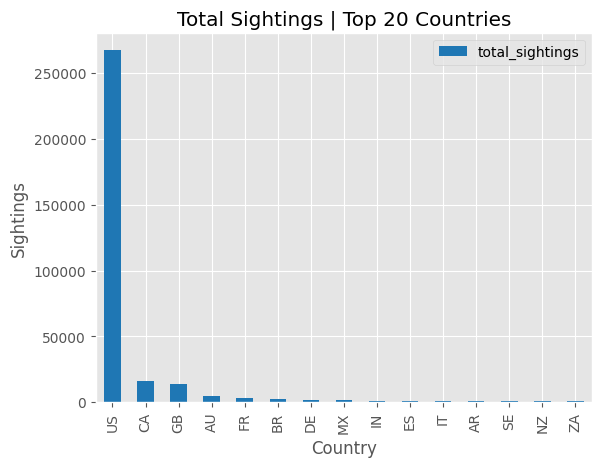

In [54]:
tmp.plot(
    kind='bar', 
    x='country', 
    y='total_sightings',
    grid=True,
    title="Total Sightings | Top 20 Countries",
    xlabel="Country",
    ylabel="Sightings",
    cmap=cmap)

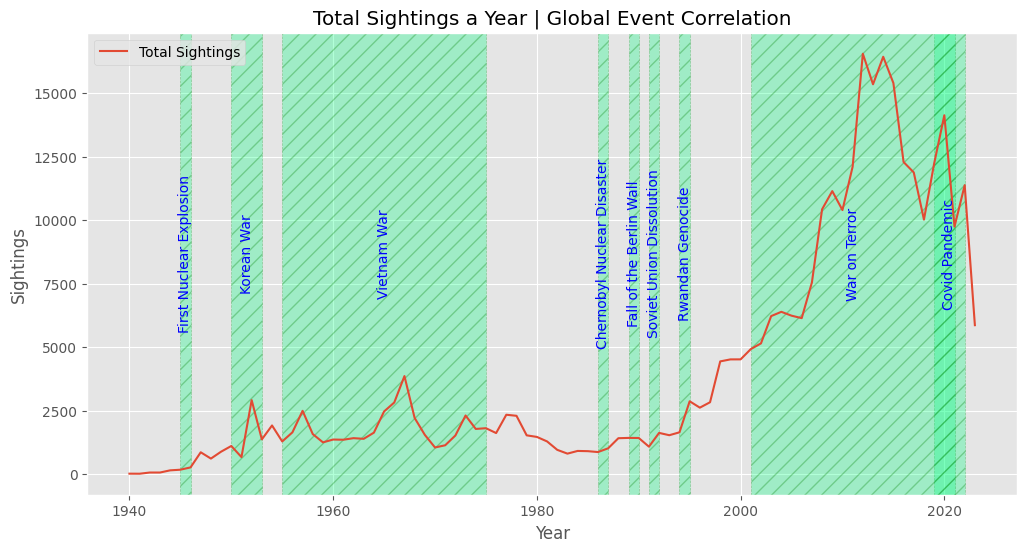

In [170]:
tmp = df[
    (df['year'] >= 1940)
    ].copy()

by_year_1900 = tmp.groupby('year')['year'].count().reset_index(name='total_year').sort_values(by='year', ascending=False)
ax = by_year_1900.plot(kind='line', x='year', y='total_year', figsize=(12, 6), grid=True, title="Total Sightings a Year | Global Event Correlation", xlabel="Year", ylabel="Sightings")
ax.legend(['Total Sightings'])

events = {
    'First Nuclear Explosion': [1945, 1946],
    'Covid Pandemic': [2019, 2022],
    'Vietnam War': [1955, 1975],
    "Korean War": [1950, 1953],
    "War on Terror": [2001, 2021],
    "Chernobyl Nuclear Disaster": [1986, 1987],
    "Fall of the Berlin Wall": [1989, 1990],
    "Soviet Union Dissolution": [1991, 1992],
    "Rwandan Genocide": [1994, 1995],
}

for event, dates in events.items():
    start_date = dates[0]
    end_date = dates[1]
    event_date = (start_date + end_date) / 2  # Calculate the middle date
    ax.axvspan(start_date, end_date, alpha=0.3, edgecolor='green', facecolor="springgreen", linestyle='--', label=event, hatch='//')
    ax.text(event_date, ax.get_ylim()[1]/2, event, color='blue', ha='center', va='center', rotation=90, fontsize=10)

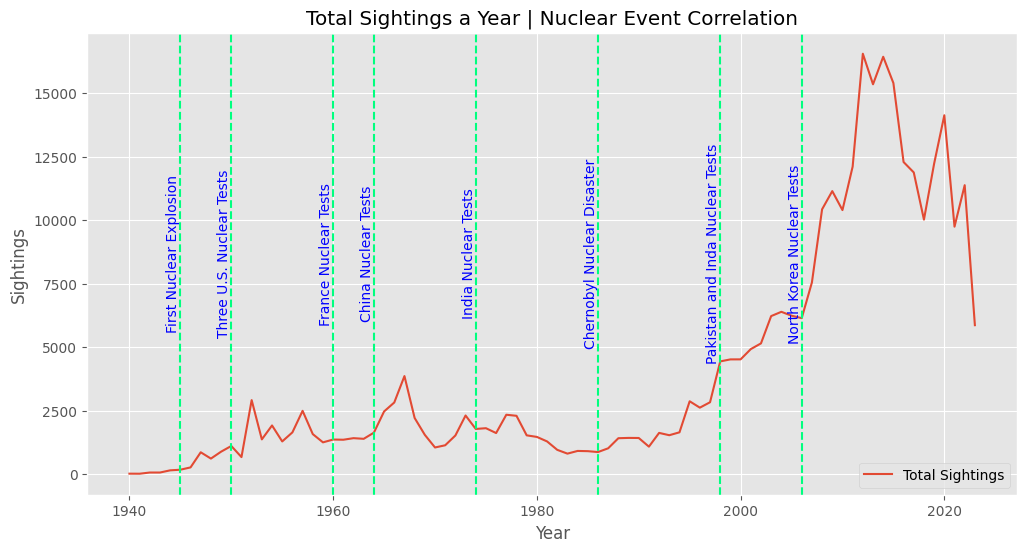

In [168]:
by_year_1900 = tmp.groupby('year')['year'].count().reset_index(name='total_year').sort_values(by='year', ascending=False)
ax = by_year_1900.plot(kind='line', x='year', y='total_year', figsize=(12, 6), grid=True, title="Total Sightings a Year | Nuclear Event Correlation", xlabel="Year", ylabel="Sightings")
ax.legend(['Total Sightings'])

events = {
    'First Nuclear Explosion': 1945,
    'Three U.S. Nuclear Tests': 1950,
    'France Nuclear Tests': 1960,
    'China Nuclear Tests': 1964,
    'India Nuclear Tests': 1974,
    'Chernobyl Nuclear Disaster': 1986,
    'Pakistan and Inda Nuclear Tests': 1998,
    'North Korea Nuclear Tests': 2006,

}

for event, date in events.items():
    start_date = dates[0]
    end_date = dates[1]
    event_date = (start_date + end_date) / 2  # Calculate the middle date
    ax.axvline(x=date, color='springgreen', linestyle='--', label='Event Year')
    ax.text(date, ax.get_ylim()[1]/2, event, color='blue', ha='right', va='center', rotation=90, fontsize=10)

In [149]:
r = requests.get("https://www.armscontrol.org/factsheets/nucleartesttally")
nuke_tests = pd.read_html(r.text)


In [150]:
nuke_tests_1 = nuke_tests[1]

In [151]:
nuke_tests_1.columns = ["Year", "United States", "USSR/Russia", "United Kingdom", "France", "China", "India", "Pakistan", "North Korea", "Total"]
nuke_tests_1 = nuke_tests_1[2:]
nuke_tests_1.to_parquet("./data/all_nuclear_tests.parquet")

In [163]:
def check(tests) -> bool:
    bad_tests = ["0", 0, np.nan]
    if tests not in bad_tests:
        return True
    return False

nuke_tests_dict = {}
for index, row in nuke_tests_1.iterrows():

    try:
        year = int(row['Year'])
    except:
        continue

    data = {
        "United States" : row['United States'],
        "USSR/Russia" : row['USSR/Russia'],
        "United Kingdom" : row['United Kingdom'],
        "France" : row['France'],
        "China" : row['China'],
        "India" : row['India'],
        "Pakistan" : row['Pakistan'],
        "North Korea" : row['North Korea'],
    }

    for contry, tests in data.items():
        if check(tests):
            nuke_tests_dict[f'{contry} | {row["Year"]} | {int(tests)} Tests'] = year

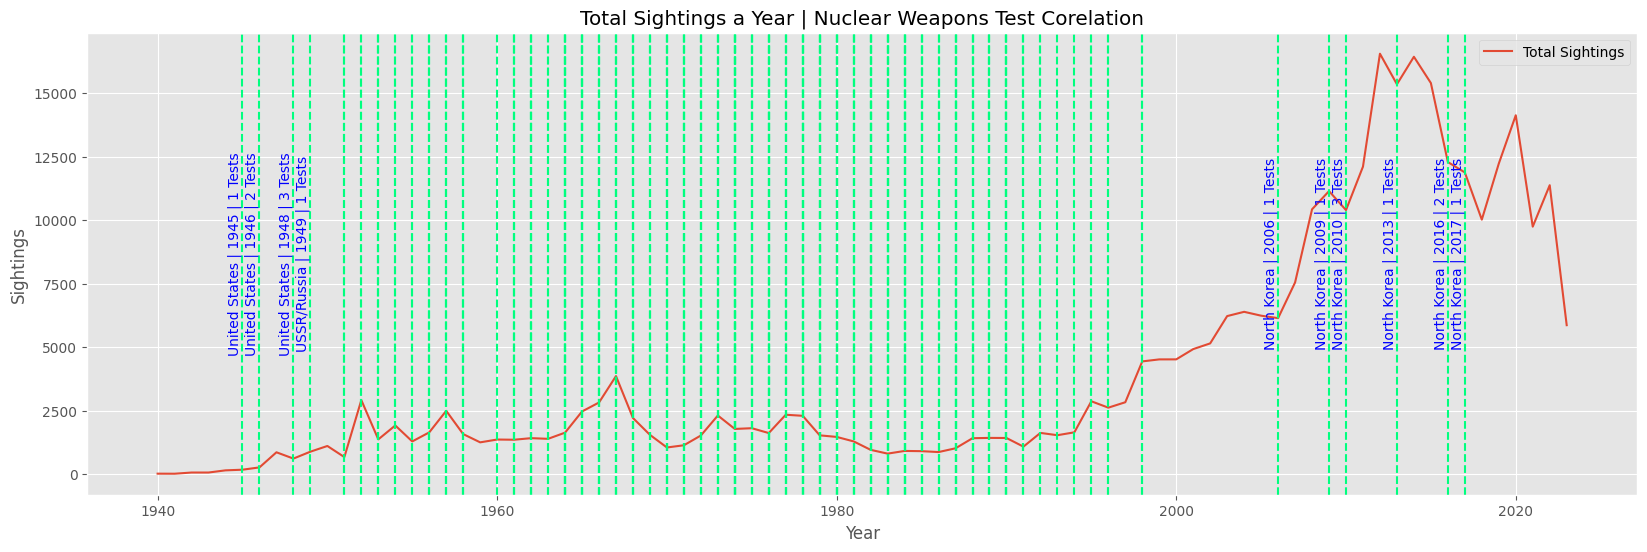

In [171]:
by_year_1900 = tmp.groupby('year')['year'].count().reset_index(name='total_year').sort_values(by='year', ascending=False)
ax = by_year_1900.plot(kind='line', x='year', y='total_year', figsize=(20, 6), grid=True, title="Total Sightings a Year | Nuclear Weapons Test Corelation", xlabel="Year", ylabel="Sightings")
ax.legend(['Total Sightings'])

for event, date in nuke_tests_dict.items():
    ax.axvline(x=date, color='springgreen', linestyle='--', label='Event Year')
    if date < 1950 or date > 2000:
        ax.text(date, ax.get_ylim()[1]/2, event, color='blue', ha='right', va='center', rotation=90, fontsize=10)
